###

#### Implemente el método de validación cruzada con K-iteraciones para encontrar el o los mejores parámetros de los algoritmos K-NN y árbol de decisión. Lo mismo pero usando "leave-one-out".

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn import tree 
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('./ecoli.csv') 
df

,sequence,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...
331,TREA_ECOLI,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,UGPB_ECOLI,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,USHA_ECOLI,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,XYLF_ECOLI,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


In [25]:
X = df.drop(['sequence', 'class'], axis=1)
X

,mcg,gvh,lip,chg,aac,alm1,alm2
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35
...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37


In [26]:
y = df['class']
y

0      cp
1      cp
2      cp
3      cp
4      cp
       ..
331    pp
332    pp
333    pp
334    pp
335    pp
Name: class, Length: 336, dtype: object

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [30]:
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=23, max_depth=7)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=23)

[Text(0.5909598214285714, 0.9375, 'alm1 <= 0.585\nentropy = 2.192\nsamples = 268\nvalue = [114.0, 59.0, 1.0, 2.0, 29.0, 16.0, 4.0, 43.0]\nclass = cp'),
 Text(0.39732142857142855, 0.8125, 'gvh <= 0.585\nentropy = 1.41\nsamples = 175\nvalue = [114, 2, 0, 1, 0, 15, 3, 40]\nclass = cp'),
 Text(0.494140625, 0.875, 'True  '),
 Text(0.2767857142857143, 0.6875, 'mcg <= 0.62\nentropy = 0.768\nsamples = 128\nvalue = [113, 2, 0, 1, 0, 3, 3, 6]\nclass = cp'),
 Text(0.14285714285714285, 0.5625, 'alm2 <= 0.475\nentropy = 0.3\nsamples = 115\nvalue = [110, 2, 0, 0, 0, 0, 0, 3]\nclass = cp'),
 Text(0.07142857142857142, 0.4375, 'mcg <= 0.55\nentropy = 0.147\nsamples = 95\nvalue = [93, 0, 0, 0, 0, 0, 0, 2]\nclass = cp'),
 Text(0.03571428571428571, 0.3125, 'aac <= 0.525\nentropy = 0.088\nsamples = 90\nvalue = [89, 0, 0, 0, 0, 0, 0, 1]\nclass = cp'),
 Text(0.017857142857142856, 0.1875, 'entropy = 0.0\nsamples = 69\nvalue = [69, 0, 0, 0, 0, 0, 0, 0]\nclass = cp'),
 Text(0.05357142857142857, 0.1875, 'aac <= 

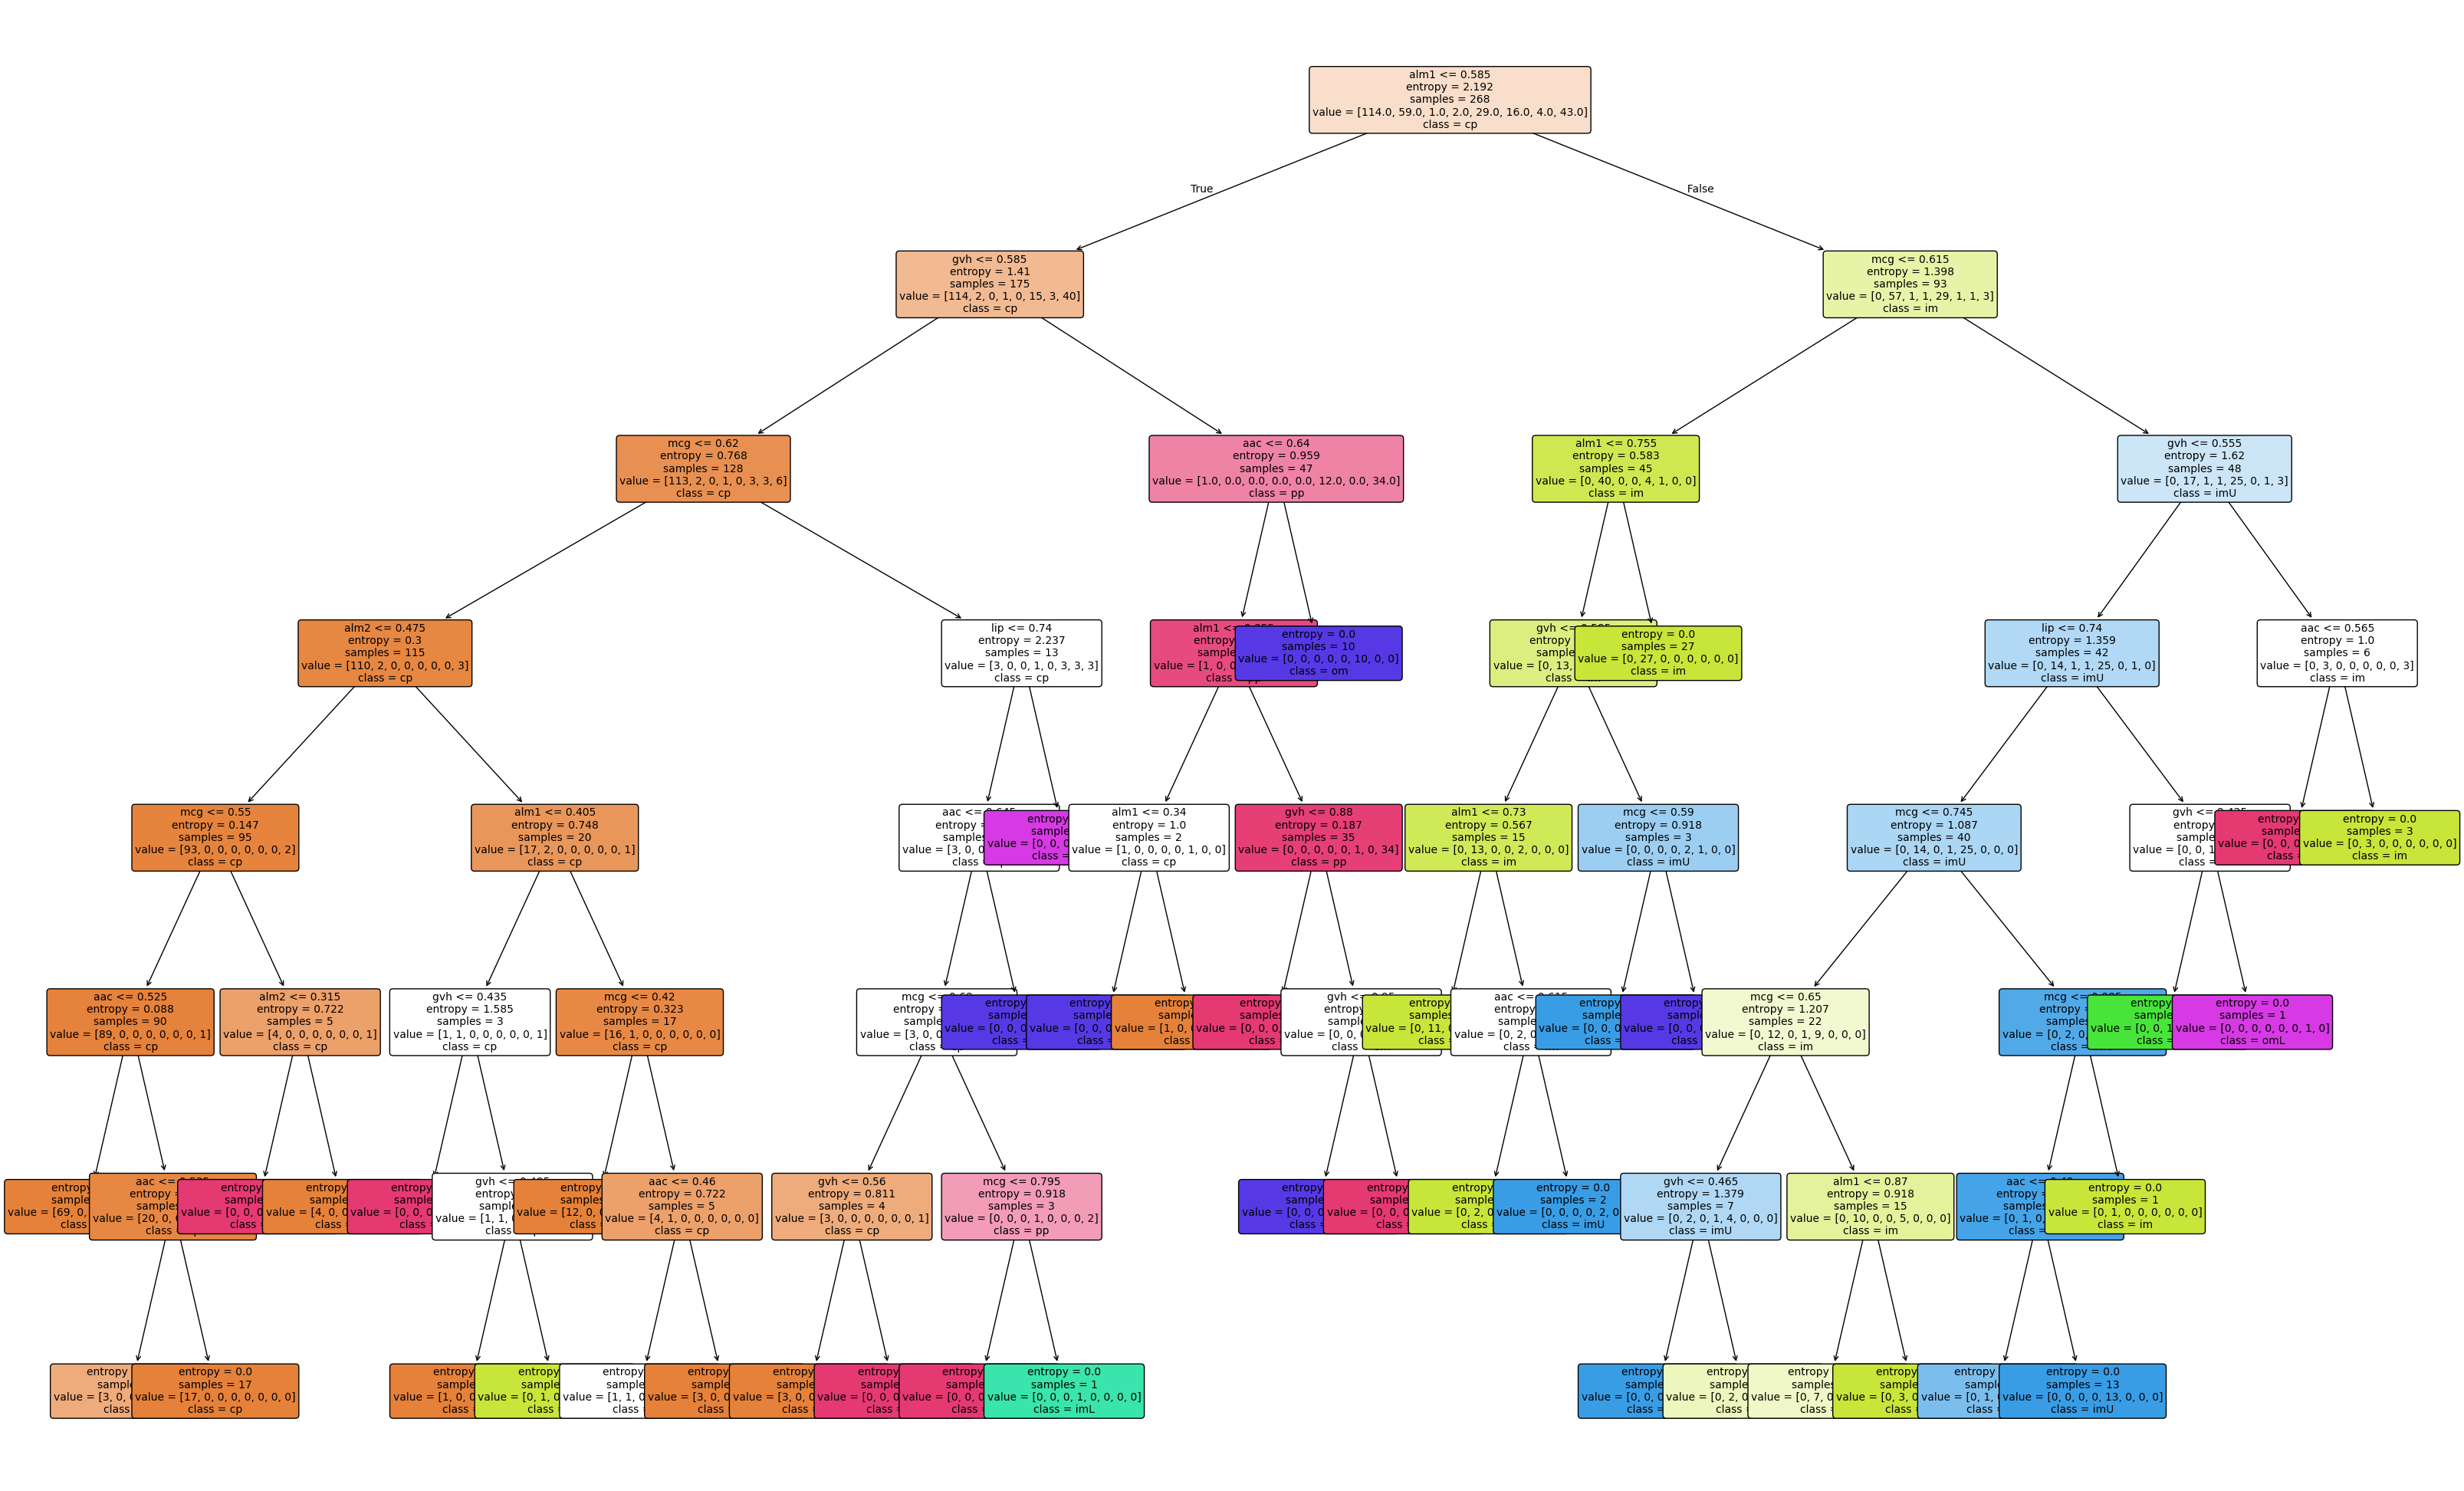

In [31]:
plt.figure(figsize=(40, 25))
tree.plot_tree(
    clf,
    feature_names=X.columns,
    class_names=y.astype(str).unique(),
    filled=True,
    rounded=True,
    fontsize=10
)